In [37]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import warnings
warnings.filterwarnings("ignore")

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas: 1.0.3
Numpy: 1.17.2
Sklearn: 0.22.1
Matplotlib: 3.1.3
Keras: 2.2.4


In [3]:
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix

In [4]:
# import the heart disease dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# the names will be the names of each column in our pandas DataFrame
names = ['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'class']

# read the csv
cleveland = pd.read_csv(url, names=names)

In [5]:
print ('Shape of DataFrame: {}'.format(cleveland.shape))
print (cleveland.loc[1])

Shape of DataFrame: (303, 14)
age          67
sex           1
cp            4
trestbps    160
chol        286
fbs           0
restecg       2
thalach     108
exang         1
oldpeak     1.5
slope         2
ca          3.0
thal        3.0
class         2
Name: 1, dtype: object


In [6]:
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [7]:
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1


In [8]:
print(data.shape)
print(data.dtypes)

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [9]:
data = data.apply(pd.to_numeric)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


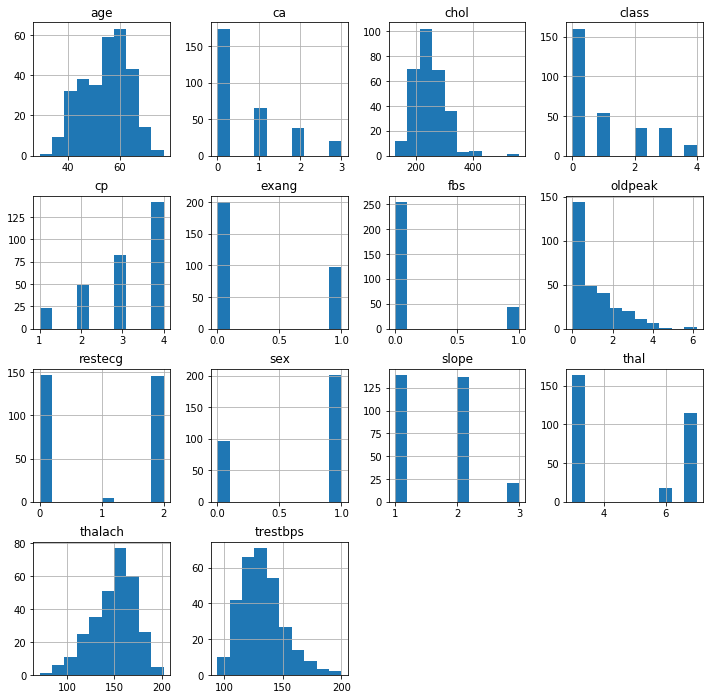

In [11]:
data.hist(figsize = (12,12))
plt.show()

In [12]:
# create X and Y datasets for training
from sklearn import model_selection

In [13]:
X = np.array(data.drop(['class'], 1))
y = np.array(data['class'])

In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [17]:
#convert the data to categorical labels

from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes = None)
Y_test = to_categorical(y_test, num_classes = None)

print(Y_train.shape)
print(Y_train[:10])

(237, 5)
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [19]:
# define an object
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
model = tf.keras.models.Sequential()

In [22]:
model.add(tf.keras.layers.Dense(units=8, activation='relu', input_dim = 13))

In [28]:
model.add(tf.keras.layers.Dense(units=5, activation='relu'))
          
          
model.add(tf.keras.layers.Dense(units=5, activation='softmax'))
          
          
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
Total params: 247
Trainable params: 247
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train, y_train, batch_size=10, epochs=200)

Train on 237 samples
Epoch 1/200
237/237 [==============================] - 0s 132us/sample - loss: 0.8739 - accuracy: 0.6456
Epoch 2/200
237/237 [==============================] - 0s 167us/sample - loss: 0.8727 - accuracy: 0.6582
Epoch 3/200
237/237 [==============================] - 0s 139us/sample - loss: 0.8901 - accuracy: 0.6329
Epoch 4/200
237/237 [==============================] - 0s 145us/sample - loss: 0.8779 - accuracy: 0.6456
Epoch 5/200
237/237 [==============================] - 0s 136us/sample - loss: 0.8719 - accuracy: 0.6371
Epoch 6/200
237/237 [==============================] - 0s 148us/sample - loss: 0.8862 - accuracy: 0.6371
Epoch 7/200
237/237 [==============================] - 0s 135us/sample - loss: 0.8916 - accuracy: 0.6329
Epoch 8/200
237/237 [==============================] - 0s 127us/sample - loss: 0.8840 - accuracy: 0.6456
Epoch 9/200
237/237 [==============================] - 0s 129us/sample - loss: 0.8852 - accuracy: 0.6456
Epoch 10/200
237/237 [============

In [36]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)

60/60 [==============================] - 0s 810us/sample - loss: 1.0194 - accuracy: 0.5500


In [38]:
print('Test Accuracy: {}'.format(test_acc))

Test Accuracy: 0.550000011920929


In [40]:
y_pred = model.predict_classes(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[30  1  2  0]
 [ 7  1  8  0]
 [ 3  0  2  0]
 [ 0  0  6  0]]


In [42]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.55
